<a href="https://colab.research.google.com/github/Megatron1010/Git-demo/blob/master/Classifiation_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Hackathon

GitHub Link: https://github.com/Megatron1010/Git-demo/blob/master/Classifiation_hackathon.ipynb

# Classification Hackathon

For the specifications for today's Hackathon use the slides linked below. Just note a couple things before you start:
* Use your full name and ```_EDSA``` as your Zindi username.
* The dataset for this challenge is very large and will take a long time to process. In order to use your time wisely, only use a small subset of the data to figure out how to solve this challenge, and once you're happy with that, train your model with the entire dataset.
* This Zindi challenge is tough. This will be taken into account when the supervisors mark your work. Do not worry too much about your placement on the leaderboard. In the Regression Hackathon ```laura_the_explorer``` was in first place but is outside the top 100 in this challenge
* To submit your Hackathon to Athena, zip your notebook and your submission csv file, and upload that here. Note that your report card will say you have 100% once you submit your file.
* Please attach the *Honour code* (below) cell to your notebook. 

Further instructions found on these slides: https://docs.google.com/presentation/d/1AbVndI5aOd27Jm0E1qNoYzRtWiZ6-DE3BDE0djGxzIk/edit?usp=sharing

** Good luck! **

## Honour Code
I Anga Tinzi, confirm - by submitting my - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns

from sklearn.utils import resample
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score


Importing the dataset

Please uncomment if using colaboratory

In [0]:
#from google.colab import files
#uploaded = files.upload() # Code used to import csv files from local drive

In [0]:
#train_df = pd.read_csv(io.BytesIO(uploaded['training.csv']))
#test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))


In [0]:
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('test.csv')

In [0]:
train_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [0]:
test_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


Check for missing values

In [0]:
missing = train_df.isnull().sum()
missing

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [0]:
missing = test_df.isnull().sum()
missing

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
dtype: int64

In [0]:
train_df.shape

(95662, 16)

In [0]:
test_df.shape

(45019, 15)

Function to show the distribution of of transaction by Fraud Result.

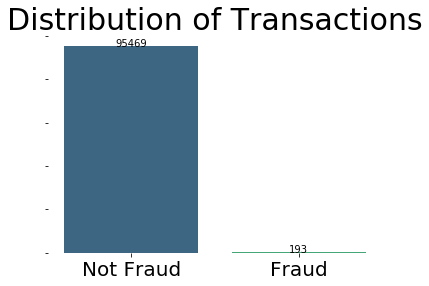

In [0]:
fig, ax = plt.subplots()
x = sns.countplot(train_df['FraudResult'], palette='viridis')
x.set_xticklabels(['Not Fraud', 'Fraud'])
x.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Transactions', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.show()

Oversampling minoritty data

In [0]:
# separate minority and majority classes
fraud = train_df[train_df['FraudResult']== 1]
not_fraud = train_df[train_df['FraudResult']== 0]


# Resampling the minority
resampled_fraud = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
resampled_train_df = pd.concat([not_fraud, resampled_fraud]) 

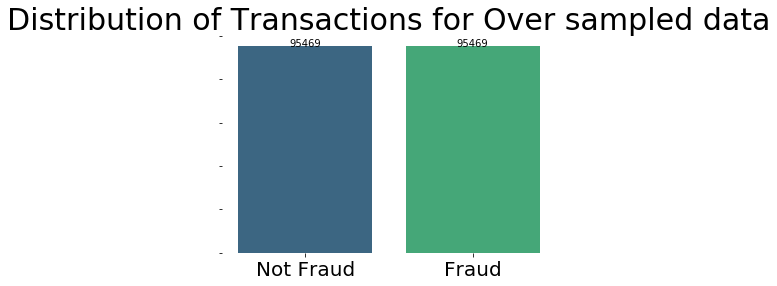

In [0]:
fig, ax = plt.subplots()
x = sns.countplot(resampled_train_df['FraudResult'], palette='viridis')
x.set_xticklabels(['Not Fraud', 'Fraud'])
x.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Transactions for Over sampled data', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.show()

Undersampling Majority Class

In [0]:
# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
under_sampled = pd.concat([not_fraud_downsampled, fraud])



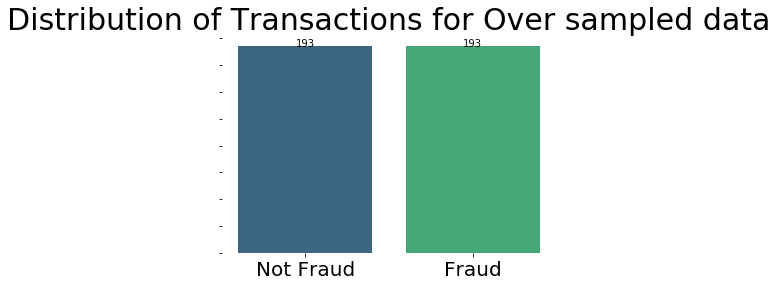

In [0]:
fig, ax = plt.subplots()
x = sns.countplot(under_sampled['FraudResult'], palette='viridis')
x.set_xticklabels(['Not Fraud', 'Fraud'])
x.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Transactions for Over sampled data', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.show()

Converting all columns with categorical data to numerical data with LabelEncoder

In [0]:
resampled_train_df.columns
under_sampled.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [0]:
def transformer(df,cols):
  
  
    '''
        Transforms columns of X specified in df.columns using
        LabelEncoder(). 
    '''
    output = df.copy()
  
    for col in df.columns:
        if col in cols:
            output[col] = LabelEncoder().fit_transform(output[col])
    return output
    
   
    

In [0]:
cols =['BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId']

In [0]:
train_df = transformer(resampled_train_df, cols)
test_df = transformer(test_df, cols)

under_train_df = transformer(under_sampled, cols)

Convert string date to datetime

In [0]:
train_df['Date'] =  pd.to_datetime(train_df['TransactionStartTime'],format='%Y-%m-%d')
test_df['Date'] =  pd.to_datetime(test_df['TransactionStartTime'],format='%Y-%m-%d')
under_train_df['Date'] = pd.to_datetime(under_train_df['TransactionStartTime'],format='%Y-%m-%d')

Droping the 'TransactionStartTime' column

In [0]:
train_df = train_df.drop('TransactionStartTime', axis=1)
test_df = test_df.drop('TransactionStartTime', axis=1)
under_train_df = under_train_df.drop('TransactionStartTime', axis=1)

Standarization of the new numerical data

In [0]:
cols1 = ['BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'PricingStrategy']

In [0]:
def scaler(df, cols):
  
    '''
        Standadize columns specified in cols using
        StandardScaler(). 
    '''
 
    output = df.copy()
  
    features = df[cols]
    scalr = StandardScaler().fit(features.values)
    features = scalr.transform(features.values)
    output[cols] = features
  
    return output
    
  

In [0]:
train_df = scaler(train_df, cols1)

test_df = scaler(test_df, cols1)

under_train_df = scaler(under_train_df, cols1)

In [0]:
def norm_time(df):
    
  # prepare data for standardization
    time = df['Date'].values
    time = time.reshape((len(time), 1))
  # train the standardization
    scaler = StandardScaler()
    scaler = scaler.fit(time)

# standardization the dataset and print the first 5 rows
    df['normalized_date'] = scaler.transform(time)
    return df


In [0]:
train_df = norm_time(train_df)
test_df = norm_time(test_df)
under_train_df = norm_time(under_train_df)

C:\Users\Tinzi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype datetime64[ns] was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
test_df.shape

(45019, 16)

In [0]:
train_df.shape

(190938, 17)

Getting X and Y trains

In [0]:
X = train_df
X_train = X.drop(['FraudResult', 'TransactionId', 'Date'], axis=1)
y_train = X['FraudResult']

X_test = test_df.drop(['TransactionId', 'Date'], axis=1)

X1_train = under_train_df.drop(['FraudResult', 'TransactionId', 'Date'], axis=1)
y1_train = under_train_df['FraudResult']

Model training

In [0]:

# KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

model = knn.fit(X_train, y_train) 
model1 = knn.fit(X1_train, y1_train)

# LogisticRegression
logreg = LogisticRegression()

model2 = logreg.fit(X_train, y_train) 
model3 = logreg.fit(X1_train, y1_train) 


# RandomForest
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

model4 = rfc.fit(X_train, y_train)  
model5 = rfc.fit(X1_train, y1_train)

Predicting y for X_test

In [0]:
# KNeighborsClassifier
y_pred_knn = model.predict(X_test) 
y_pred_knn1 = model1.predict(X_test) 

# LogisticRegression
y_pred_log = model2.predict(X_test)
y_pred_log1 = model3.predict(X_test)

# RandomForest
y_pred_rfc = model4.predict(X_test)
y_pred_rfc1 = model5.predict(X_test)


Submission to csv file

In [0]:
# Create submission dataframe and add predictions to it
sub = pd.DataFrame()
sub['TransactionId'] = test_df['TransactionId']
sub['FraudResult'] = y_pred_knn

sub1 = pd.DataFrame()
sub1['TransactionId'] = test_df['TransactionId']
sub1['FraudResult'] = y_pred_log

sub2 = pd.DataFrame()
sub2['TransactionId'] = test_df['TransactionId']
sub2['FraudResult'] = y_pred_knn1

sub3 = pd.DataFrame()
sub3['TransactionId'] = test_df['TransactionId']
sub3['FraudResult'] = y_pred_log1

sub4 = pd.DataFrame()
sub4['TransactionId'] = test_df['TransactionId']
sub4['FraudResult'] = y_pred_rfc

sub5 = pd.DataFrame()
sub5['TransactionId'] = test_df['TransactionId']
sub5['FraudResult'] = y_pred_rfc1

# Write submission dataframe to a csv for submission
sub.to_csv('over_submission_knn.csv', index=False)
sub1.to_csv('over_submission_log.csv', index=False)
sub2.to_csv('under_submission_knn.csv', index=False)
sub3.to_csv('under_submission_log.csv', index=False)
sub2.to_csv('over_submission_rfc.csv', index=False)
sub3.to_csv('under_submission_rfc.csv', index=False)

Downloading submission files to local drive

In [0]:
files.download("over_submission_knn.csv")
files.download("over_submission_log.csv")
files.download("under_submission_knn.csv")
files.download("under_submission_log.csv")
files.download("over_submission_rfc.csv")
files.download("under_submission_rfc.csv")